# **FIRST ITERATION: PER STORE**

## Walmart Sales Analysis

### Import Libraries & Load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('/walmart.csv')


print("Dataset loaded successfully!")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

Dataset loaded successfully!
Shape: (6435, 8)
Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


### Find Missing Values

In [4]:
print(f"\nMissing values: {data.isnull().sum().sum()}")
print(f"\nData types:")
print(data.dtypes)


Missing values: 0

Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


### Convert date column (DD-MM-YYYY format)


In [5]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
print(f"\nDate range: {data['Date'].min()} to {data['Date'].max()}")


print("\nFirst 5 rows:")
print(data.head())


Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00

First 5 rows:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


### Initial Calculations

In [6]:
print(f"\nWeekly Sales Statistics:")
print(f"Mean: ${data['Weekly_Sales'].mean():,.2f}")
print(f"Median: ${data['Weekly_Sales'].median():,.2f}")
print(f"Min: ${data['Weekly_Sales'].min():,.2f}")
print(f"Max: ${data['Weekly_Sales'].max():,.2f}")


Weekly Sales Statistics:
Mean: $1,046,964.88
Median: $960,746.04
Min: $209,986.25
Max: $3,818,686.45


## Visualizations

### Visualization 1: Sales over time


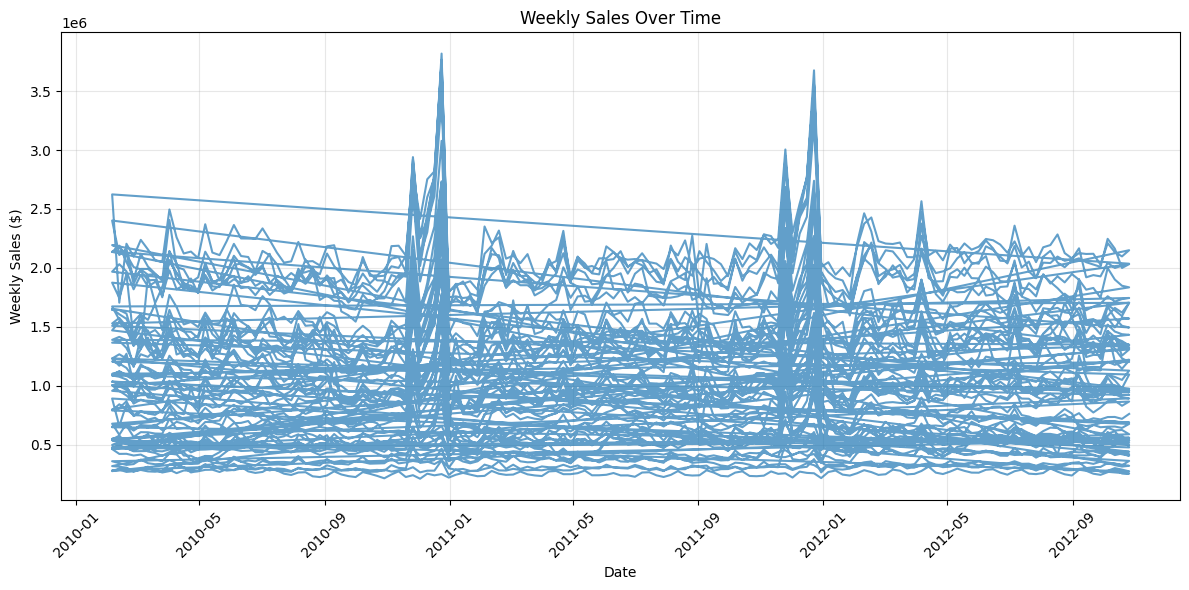

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Weekly_Sales'], alpha=0.7)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Visualization 2: Holiday vs Non-Holiday

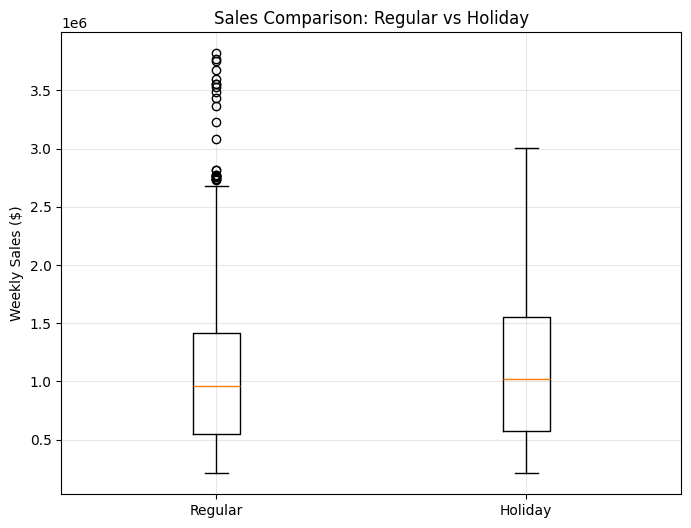


Average Regular Sales: $1,041,256.38
Average Holiday Sales: $1,122,887.89


In [8]:

if 'Holiday_Flag' in data.columns:
    holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales']
    regular_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales']

    plt.figure(figsize=(8, 6))
    plt.boxplot([regular_sales, holiday_sales], labels=['Regular', 'Holiday'])
    plt.title('Sales Comparison: Regular vs Holiday')
    plt.ylabel('Weekly Sales ($)')
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nAverage Regular Sales: ${regular_sales.mean():,.2f}")
    print(f"Average Holiday Sales: ${holiday_sales.mean():,.2f}")

### Visualization 3: Monthly sales pattern

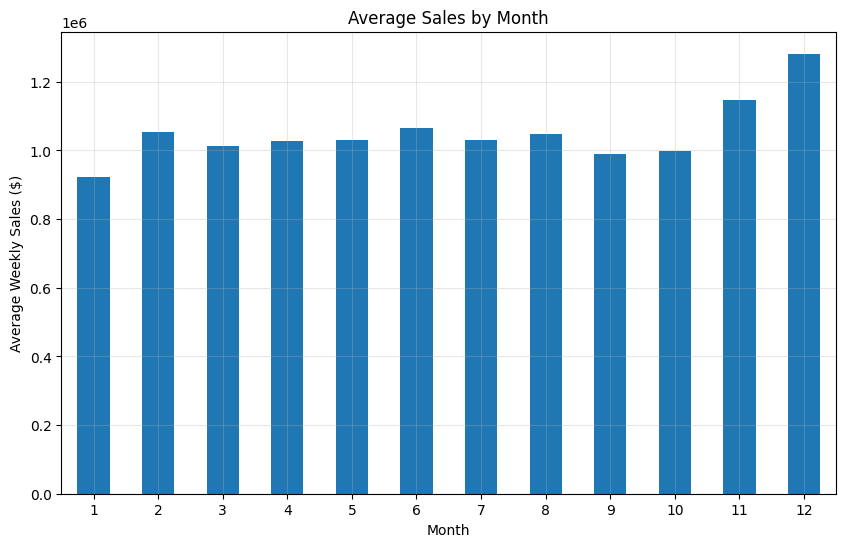

In [9]:
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

### Visualization 4: Correlation matrix

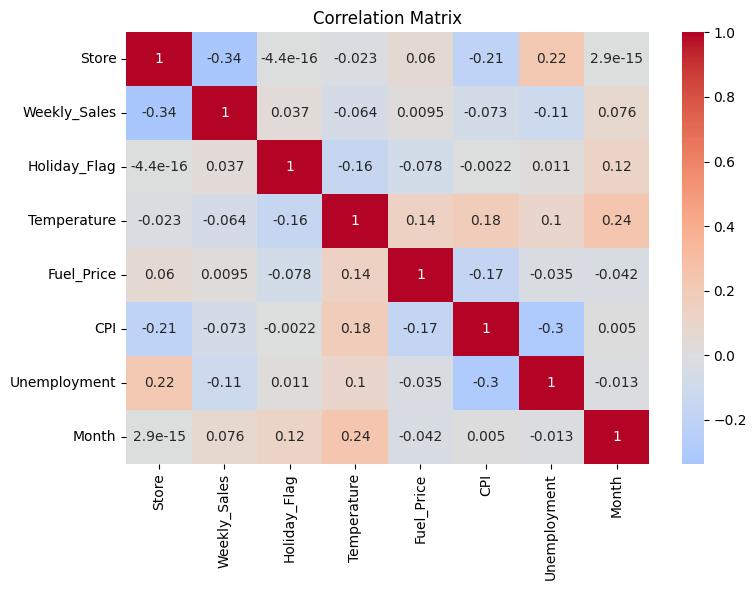

In [10]:
plt.figure(figsize=(8, 6))
numeric_cols = data.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Time Series Analysis

### Aggregate by week

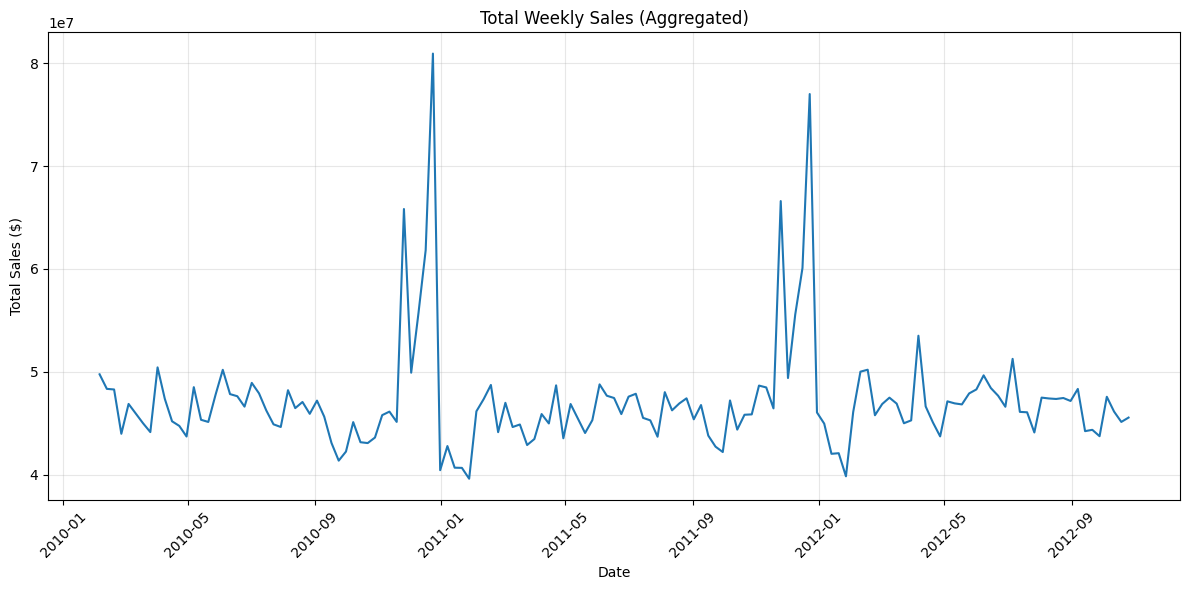

In [11]:

data_weekly = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
data_weekly = data_weekly.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(data_weekly['Date'], data_weekly['Weekly_Sales'])
plt.title('Total Weekly Sales (Aggregated)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Forecasting with average

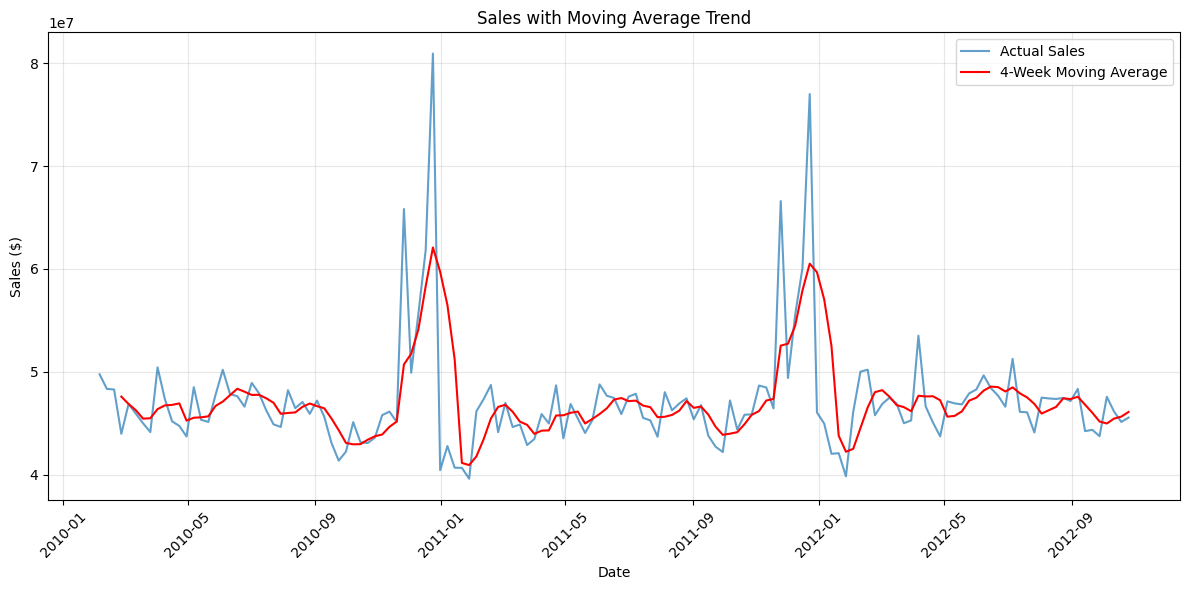

In [13]:
window = 4 # Define window size
data_weekly['Moving_Avg'] = data_weekly['Weekly_Sales'].rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_weekly['Date'], data_weekly['Weekly_Sales'], label='Actual Sales', alpha=0.7)
plt.plot(data_weekly['Date'], data_weekly['Moving_Avg'], label=f'{window}-Week Moving Average', color='red')
plt.title('Sales with Moving Average Trend')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Prediction for next weeks

In [15]:
last_avg = data_weekly['Moving_Avg'].dropna().iloc[-1]
print(f"\nSimple Forecast (based on {window}-week moving average):")
print(f"Next week estimated sales: ${last_avg:,.2f}")


Simple Forecast (based on 4-week moving average):
Next week estimated sales: $46,090,420.11


## Store performance analysis


Top 5 Stores by Average Sales:
        Avg_Sales   Total_Sales
Store                          
20     2107676.87  3.013978e+08
4      2094712.96  2.995440e+08
14     2020978.40  2.889999e+08
13     2003620.31  2.865177e+08
2      1925751.34  2.753824e+08


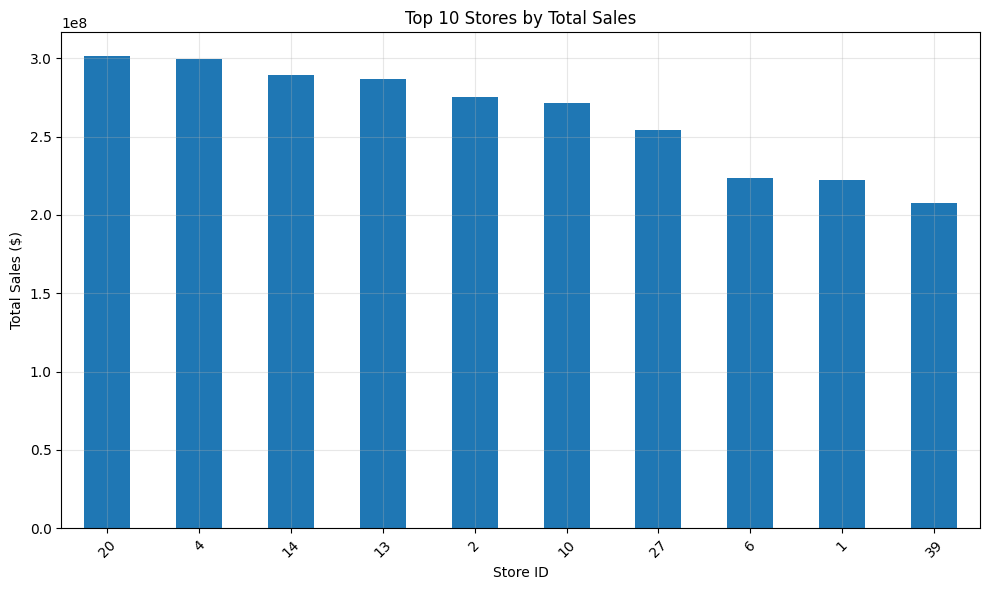


Analysis completed!
Key insights:
1. Check the sales trend over time
2. Compare holiday vs regular sales performance
3. Identify seasonal patterns by month
4. Review store performance rankings
5. Use moving average for simple forecasting


In [16]:
if 'Store' in data.columns:
    store_performance = data.groupby('Store')['Weekly_Sales'].agg(['mean', 'sum']).round(2)
    store_performance.columns = ['Avg_Sales', 'Total_Sales']

    print(f"\nTop 5 Stores by Average Sales:")
    print(store_performance.sort_values('Avg_Sales', ascending=False).head())

    # Plot top stores
    top_stores = store_performance.sort_values('Total_Sales', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    top_stores['Total_Sales'].plot(kind='bar')
    plt.title('Top 10 Stores by Total Sales')
    plt.xlabel('Store ID')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\nAnalysis completed!")
print("Key insights:")
print("1. Check the sales trend over time")
print("2. Compare holiday vs regular sales performance")
print("3. Identify seasonal patterns by month")
print("4. Review store performance rankings")
print("5. Use moving average for simple forecasting")